In [1]:
# Estadistica inferencial.

In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# traigo mis datos....tal vez los use!!

df = pd.read_csv("./files/bank-additional-clean-nonulls.csv", index_col = 0)
df.head(2)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8


## Distribuciones.

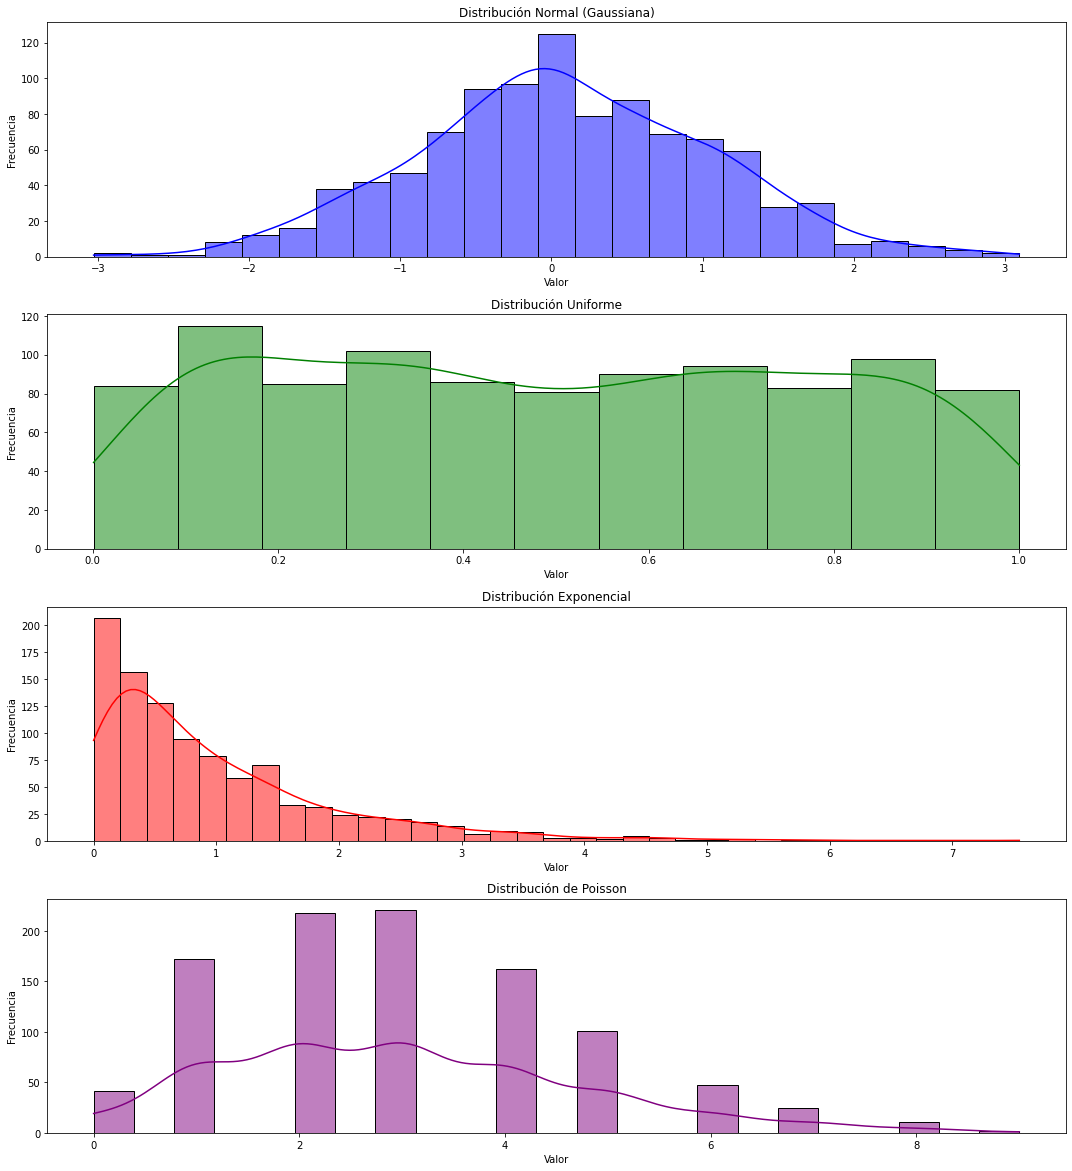

In [3]:
# A: Distribución Normal (Gaussiana)
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# B: Distribución Uniforme
data_uniforme = np.random.uniform(low=0, high=1, size=1000)

# C: Distribución Exponencial
data_exponencial = np.random.exponential(scale=1, size=1000)

# D: Distribución de Poisson
data_poisson = np.random.poisson(lam=3, size=1000)

# E: Distribución Binomial
data_binomial = np.random.binomial(n=10, p=0.5, size=1000)

# Configuración de los gráficos
plt.figure(figsize=(15, 20))

# Graficar Distribución Normal
plt.subplot(5, 1, 1)
sns.histplot(data_normal, kde=True, color='blue')
plt.title('Distribución Normal (Gaussiana)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución Uniforme
plt.subplot(5, 1, 2)
sns.histplot(data_uniforme, kde=True, color='green')
plt.title('Distribución Uniforme')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución Exponencial
plt.subplot(5, 1, 3)
sns.histplot(data_exponencial, kde=True, color='red')
plt.title('Distribución Exponencial')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Graficar Distribución de Poisson
plt.subplot(5, 1, 4)
sns.histplot(data_poisson, kde=True, color='purple')
plt.title('Distribución de Poisson')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


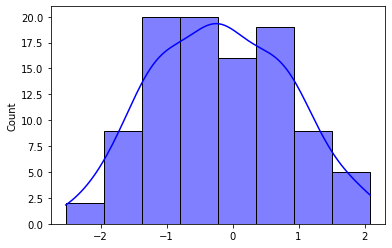

In [5]:
# distribución normal
datos_normal = np.random.normal(0,1, 100)
sns.histplot(datos_normal, kde=True, color='blue'); 

In [ ]:
## test shapiro: muestras pequeñas (menos de 500)
## test de kolgomorov: muestras grandes (más de 500)



In [6]:
## test de shapiro
p_value_shapiro = shapiro(datos_normal).pvalue
p_value_shapiro
print(f"El p-valor obtenido con el test de Shapiro es: {p_value_shapiro}")

El p-valor obtenido con el test de Shapiro es: 0.5500143766403198


In [8]:
#test de kolmogorov
p_value_k = kstest(datos_normal, 'norm').pvalue
p_value_k

0.14571277726466345

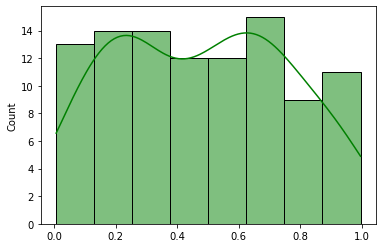

In [9]:
# distribucion uniforme
datos_uniforme = np.random.uniform(0,1, 100)
sns.histplot(datos_uniforme, kde=True, color='green');

In [11]:
#test de kolmogorov
p_value_k = kstest(datos_uniforme, 'uniform').pvalue
p_value_k

0.5403039734544532

# Intervalo de confianza

In [18]:
## Intervalo de confianza =  Estimación Puntual ± Valor Crítico * Error Estándar

# lo primero que tenemos que hacer es calcular la estimación puntual, en este caso calcularemos la media de la duración de las llamadas
media_duracion = df["duration"].mean()


# después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
error_duracion = stats.sem(df["duration"])

# definimos el nivel de confianza (95% en este caso)
nivel_confianza_duracion = 0.95

# calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
grados_libertad_duracion = len(df["duration"]) - 1

# calculamos el valor crítico de la muestra
valor_critico_duracion = stats.t.ppf((1 + nivel_confianza_duracion) / 2, df=grados_libertad_duracion)

# calculamos el intervalo de confianza
limite_inferior_duracion = media_duracion - valor_critico_duracion * error_duracion
limite_superior_duracion = media_duracion + valor_critico_duracion * error_duracion

print("Intervalo de Confianza para la Duración de Llamadas Telefónicas:")
print(f"Media Muestral: {np.round(media_duracion, 2)}")
print(f"Error Estándar: {np.round(error_duracion, 2)}")
print(f"Nivel de Confianza: {nivel_confianza_duracion}")
print(f"Valor Crítico: {np.round(valor_critico_duracion, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior_duracion, 2)}, {np.round(limite_superior_duracion, 2)})")

257.73927906976746
1.6448890650355406
El intervalo de confianza del 80% para la variable 'duration' es: (255.6874471162588, 259.79111102327613)


# Prueba de Hipotesis

1. Definir la hipotesis nula y la hipotesis alternativa.
2. Test Student (prueba estadistica si se cumple mi hipotesis)
3. Se obtiene un valor p, si p < 0.05 se rechaza la hipotesis nula.
4. Si p > 0.05 no se rechaza la hipotesis nula.

In [19]:
# ¿ Hay una diferencia entre los ingresos promedio por educacion basic 4y?

# HO: No hay diferencia entre los ingresos promedio por educacion
# H1: Hay una diferencia entre los ingresos promedio por educacion

grupo_educacion_basica = df[df['education'] == 'basic.4y']['income']
grupo_educacion_superior = df[df['education'] == 'high school']['income']

# Prueba de hispotésis con el T Student
## levene: Prueba de homogeneidad de varianzas (mas de tres grupos levene)
## bartlett: Prueba de homogeneidad de varianzas ()

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
    
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa en los ingresos promedio entre los dos grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.")



In [20]:
prueba_hipotesis(grupo_educacion_basica, grupo_educacion_superior)

No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa en los ingresos promedio entre los dos grupos.
